In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM , Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [66]:
X = [[[(4**i)+j] for i in range (5)] for j in range(100)]
print (X)
Y = [(1024+4*i) for i in range(100)]
print (Y)

[[[1], [4], [16], [64], [256]], [[2], [5], [17], [65], [257]], [[3], [6], [18], [66], [258]], [[4], [7], [19], [67], [259]], [[5], [8], [20], [68], [260]], [[6], [9], [21], [69], [261]], [[7], [10], [22], [70], [262]], [[8], [11], [23], [71], [263]], [[9], [12], [24], [72], [264]], [[10], [13], [25], [73], [265]], [[11], [14], [26], [74], [266]], [[12], [15], [27], [75], [267]], [[13], [16], [28], [76], [268]], [[14], [17], [29], [77], [269]], [[15], [18], [30], [78], [270]], [[16], [19], [31], [79], [271]], [[17], [20], [32], [80], [272]], [[18], [21], [33], [81], [273]], [[19], [22], [34], [82], [274]], [[20], [23], [35], [83], [275]], [[21], [24], [36], [84], [276]], [[22], [25], [37], [85], [277]], [[23], [26], [38], [86], [278]], [[24], [27], [39], [87], [279]], [[25], [28], [40], [88], [280]], [[26], [29], [41], [89], [281]], [[27], [30], [42], [90], [282]], [[28], [31], [43], [91], [283]], [[29], [32], [44], [92], [284]], [[30], [33], [45], [93], [285]], [[31], [34], [46], [94],

In [0]:
X = np.array(X, dtype="float32")
Y = np.array(Y, dtype="float32")

In [0]:
X /= 500
Y /= 500

In [69]:
X.shape

(100, 5, 1)

In [70]:
Y.shape

(100,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, 
                                                random_state=5)

In [72]:
X_train

array([[[0.19 ],
        [0.196],
        [0.22 ],
        [0.316],
        [0.7  ]],

       [[0.114],
        [0.12 ],
        [0.144],
        [0.24 ],
        [0.624]],

       [[0.046],
        [0.052],
        [0.076],
        [0.172],
        [0.556]],

       [[0.08 ],
        [0.086],
        [0.11 ],
        [0.206],
        [0.59 ]],

       [[0.05 ],
        [0.056],
        [0.08 ],
        [0.176],
        [0.56 ]],

       [[0.028],
        [0.034],
        [0.058],
        [0.154],
        [0.538]],

       [[0.128],
        [0.134],
        [0.158],
        [0.254],
        [0.638]],

       [[0.144],
        [0.15 ],
        [0.174],
        [0.27 ],
        [0.654]],

       [[0.112],
        [0.118],
        [0.142],
        [0.238],
        [0.622]],

       [[0.176],
        [0.182],
        [0.206],
        [0.302],
        [0.686]],

       [[0.014],
        [0.02 ],
        [0.044],
        [0.14 ],
        [0.524]],

       [[0.178],
        [0.184],
        [

In [0]:
from keras.layers import SimpleRNN,LSTM,Flatten
model = Sequential()
model.add(LSTM((2),input_shape=(5,1),return_sequences=True))
model.add(LSTM((3),input_shape=(5,1),return_sequences=True))
model.add(Flatten())
model.add(Dense(1,activation='relu'))
#model.compile(optimizer='adam',loss='mae',metrics=['acc'])
model.compile(optimizer='adam',loss='mae',metrics=['acc'])

In [74]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 5, 2)              32        
_________________________________________________________________
lstm_12 (LSTM)               (None, 5, 3)              72        
_________________________________________________________________
flatten_3 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [75]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/1000
80/80 [==============================] - 2s 28ms/step - loss: 2.4511 - acc: 0.0000e+00 - val_loss: 2.3877 - val_acc: 0.0000e+00
Epoch 2/1000
80/80 [==============================] - 0s 285us/step - loss: 2.4475 - acc: 0.0000e+00 - val_loss: 2.3840 - val_acc: 0.0000e+00
Epoch 3/1000
80/80 [==============================] - 0s 245us/step - loss: 2.4437 - acc: 0.0000e+00 - val_loss: 2.3803 - val_acc: 0.0000e+00
Epoch 4/1000
80/80 [==============================] - 0s 239us/step - loss: 2.4400 - acc: 0.0000e+00 - val_loss: 2.3765 - val_acc: 0.0000e+00
Epoch 5/1000
80/80 [==============================] - 0s 252us/step - loss: 2.4361 - acc: 0.0000e+00 - val_loss: 2.3726 - val_acc: 0.0000e+00
Epoch 6/1000
80/80 [==============================] - 0s 235us/step - loss: 2.4322 - acc: 0.0000e+00 - val_loss: 2.3686 - val_acc: 0.0000e+00
Epoch 7/1000
80/80 [==============================] - 0s 240us/step - loss: 2.4282 - acc: 0.0000e+00 - va

In [0]:
y_predict = model.predict(X_test)

In [77]:
np.round(y_predict*500)

array([[1291.],
       [1154.],
       [1211.],
       [1137.],
       [1322.],
       [1117.],
       [1064.],
       [1104.],
       [1092.],
       [1166.],
       [1409.],
       [1174.],
       [1307.],
       [1186.],
       [1267.],
       [1162.],
       [1194.],
       [1255.],
       [1072.],
       [1303.]], dtype=float32)

In [78]:
np.round(y_test*500)

array([1288., 1152., 1208., 1136., 1320., 1116., 1064., 1104., 1092.,
       1164., 1412., 1172., 1304., 1184., 1264., 1160., 1192., 1252.,
       1072., 1300.], dtype=float32)

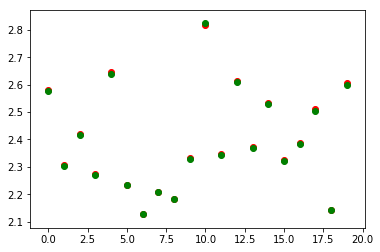

In [79]:
plt.scatter(range(20),y_predict,c = 'r')
plt.scatter(range(20),y_test ,c='g')
plt.show()

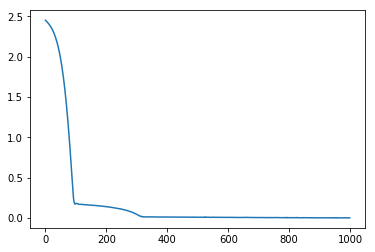

In [80]:
plt.plot(hist.history['loss'])
plt.show()